In [1]:
import pandas as pd
import numpy as np

In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, Convolution2D, MaxPooling2D, Activation, Flatten, Dropout, Dense,AveragePooling2D
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob

In [3]:
from imutils import paths

In [58]:
# initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

In [5]:
man_path=list(paths.list_images('/content/drive/My Drive/Gender/gender_dataset_face/man'))

In [6]:
print('Total Number of Man images: ',len(man_path))

Total Number of Man images:  1173


In [7]:
woman_path=list(paths.list_images('/content/drive/My Drive/Gender/gender_dataset_face/woman'))

In [8]:
print('Total Number of Woman images: ',len(woman_path))

Total Number of Woman images:  1134


In [9]:
#Displaying the man and woman images

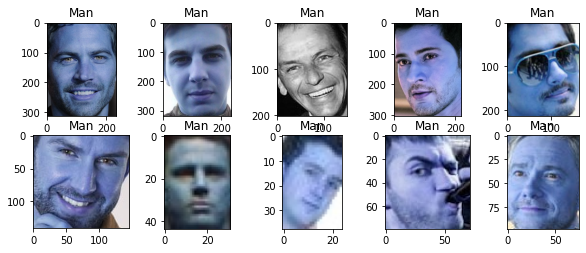

In [10]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(10):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5
    plt.imshow(cv2.imread(man_path[i]))
    plt.title('Man')

plt.show()

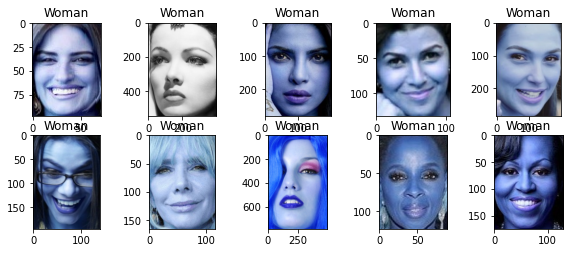

In [11]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(10):
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5
    plt.imshow(cv2.imread(woman_path[i]))
    plt.title('Woman')

plt.show()

In [37]:
data=[]
labels=[]

In [38]:
# load image files from the dataset
image_files = [f for f in glob.glob(r'/content/drive/My Drive/Gender/gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

In [41]:
# converting images to arrays and labelling the categories
for i in range(2000):

  image = cv2.imread(image_files[i])
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  image = cv2.resize(image, (96,96))
  
  data.append(image)

  label = image_files[i].split(os.path.sep)[-2]
  if label == "woman":

    label = 1
  else:
    label = 0
        
  labels.append(label)

In [42]:
man_count=0
woman_count=0

In [43]:
for i in labels:
  
  if i==1:
    woman_count=woman_count+1
  else:
    man_count=man_count+1  


In [44]:
man_count


1006

In [45]:
woman_count

994

In [46]:
print('Total Number of images: ',len(data))

Total Number of images:  2000


In [47]:
print('Total Number of labels: ',len(labels))

Total Number of labels:  2000


In [48]:
data=np.array(data)/255.0

In [49]:
labels=np.array(labels)

In [50]:
data.shape

(2000, 96, 96, 3)

In [51]:
X=data

In [52]:
y=labels

In [ ]:
#Train test split the data for training and validation

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [54]:
y_train=to_categorical(y_train,num_classes=2)

In [55]:
y_test=to_categorical(y_test,num_classes=2)

In [72]:
#Creating the data Augmentation

In [56]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [57]:
X_train.shape

(1400, 96, 96, 3)

In [ ]:
#Building the model

In [90]:
# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    

    model.add(Conv2D(128, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(32, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dense(200))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(150))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    

    model.add(Dense(100))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))



    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

In [91]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],classes=2)

In [92]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 96, 96, 128)       3584      
_________________________________________________________________
activation_35 (Activation)   (None, 96, 96, 128)       0         
_________________________________________________________________
batch_normalization_33 (Batc (None, 96, 96, 128)       512       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
activation_36 (Activation)   (None, 32, 32, 128)      

In [93]:
#Compile the model

In [94]:
adam=Adam(learning_rate=lr)

In [95]:
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [96]:
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
early=EarlyStopping(monitor='val_accuracy',patience=5)

In [98]:
history=model.fit(aug.flow(X_train,y_train,batch_size=batch_size),
                            epochs=epochs,
                            validation_data=(X_test,y_test),
                            steps_per_epoch=len(X_train) // batch_size,
                  )

Epoch 1/100
21/21 [==============================] - 85s 4s/step - loss: 1.1009 - accuracy: 0.5225 - val_loss: 0.6843 - val_accuracy: 0.5317
Epoch 2/100
21/21 [==============================] - 85s 4s/step - loss: 0.8741 - accuracy: 0.6108 - val_loss: 0.6635 - val_accuracy: 0.6417
Epoch 3/100
21/21 [==============================] - 85s 4s/step - loss: 0.7410 - accuracy: 0.6602 - val_loss: 0.6878 - val_accuracy: 0.5400
Epoch 4/100
21/21 [==============================] - 85s 4s/step - loss: 0.7363 - accuracy: 0.6594 - val_loss: 0.6914 - val_accuracy: 0.5317
Epoch 5/100
21/21 [==============================] - 85s 4s/step - loss: 0.7007 - accuracy: 0.6766 - val_loss: 0.6460 - val_accuracy: 0.5667
Epoch 6/100
21/21 [==============================] - 85s 4s/step - loss: 0.5945 - accuracy: 0.7305 - val_loss: 0.5953 - val_accuracy: 0.7067
Epoch 7/100
21/21 [==============================] - 86s 4s/step - loss: 0.5662 - accuracy: 0.7470 - val_loss: 0.6181 - val_accuracy: 0.5583
Epoch 8/100
2

In [99]:
model.evaluate(X_test,y_test)

19/19 [==============================] - 7s 383ms/step - loss: 0.0955 - accuracy: 0.9733


[0.09553159773349762, 0.9733333587646484]

In [100]:
ta=history.history['accuracy']
va=history.history['val_accuracy']

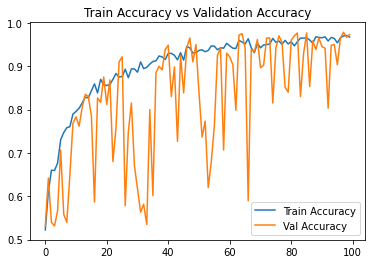

In [101]:
plt.plot(ta,label='Train Accuracy')
plt.plot(va,label='Val Accuracy')
plt.title('Train Accuracy vs Validation Accuracy')
plt.legend()

In [102]:
tl=history.history['loss']
vl=history.history['val_loss']

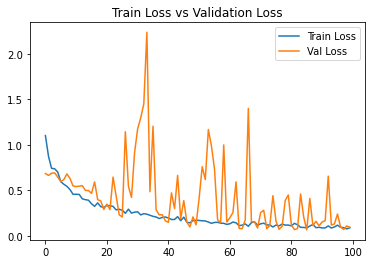

In [103]:
plt.plot(tl,label='Train Loss')
plt.plot(vl,label='Val Loss')
plt.title('Train Loss vs Validation Loss')
plt.legend()

In [108]:
model.save('GenderDetection.h5')